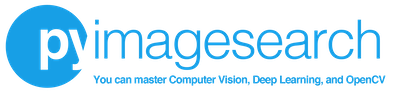

# Comparing images for similarity using siamese networks, Keras, and TensorFlow

### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [Comparing images for similarity using siamese networks, Keras, and TensorFlow](https://www.pyimagesearch.com/2020/12/07/comparing-images-for-similarity-using-siamese-networks-keras-and-tensorflow/) blog post published on 12-07-20.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook.

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2020 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Install the necessary packages

In [1]:
#!pip install tensorflow==2.3.0
import tensorflow as tf
print(tf.__version__)

2.12.0


### Download the code zip file

In [2]:
#!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/compare-images-siamese-networks/compare-images-siamese-networks.zip
#!unzip -qq compare-images-siamese-networks.zip
#%cd compare-images-siamese-networks

## Blog Post Code

### Import Packages

In [3]:
# import the necessary packages
from pyimagesearch import config
from tensorflow.keras.models import load_model
from imutils.paths import list_images
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

### Implementing our siamese network image similarity script

In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--input", required=True,
# 	help="path to input directory of testing images")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"input": "examples"
}

In [6]:
# grab the test dataset image paths and then randomly generate a
# total of 10 image pairs
print("[INFO] loading test dataset...")
testImagePaths = list(list_images(args["input"]))
np.random.seed(42)
pairs = np.random.choice(testImagePaths, size=(10, 2))

# load the model from disk
print("[INFO] loading siamese model...")
model = load_model(config.MODEL_PATH)

[INFO] loading test dataset...
[INFO] loading siamese model...


C:\Users\Msagardi\AppData\Roaming\Python\Python39\site-packages\keras\layers\core\lambda_layer.py:325: UserWarning: pyimagesearch.utils is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


1/1 [==============================] - 0s 175ms/step


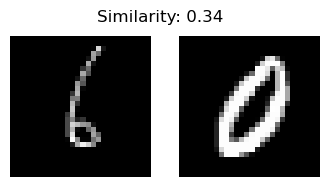

1/1 [==============================] - 0s 23ms/step


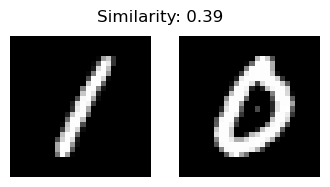

1/1 [==============================] - 0s 18ms/step


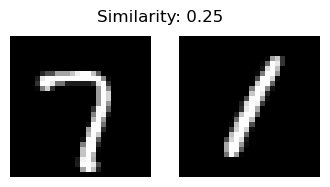

1/1 [==============================] - 0s 18ms/step


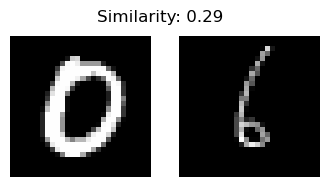

1/1 [==============================] - 0s 18ms/step


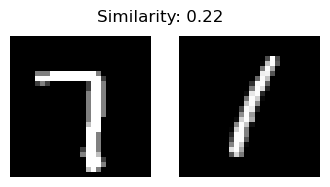

1/1 [==============================] - 0s 31ms/step


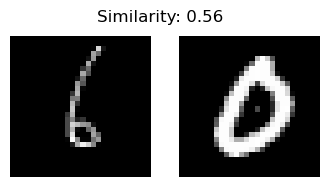

1/1 [==============================] - 0s 18ms/step


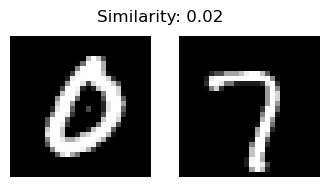

1/1 [==============================] - 0s 24ms/step


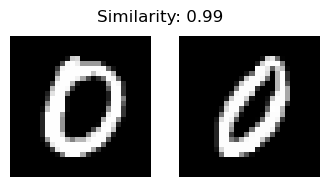

1/1 [==============================] - 0s 19ms/step


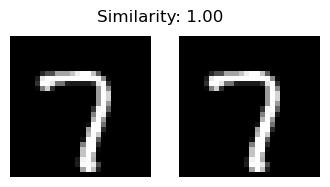

1/1 [==============================] - 0s 20ms/step


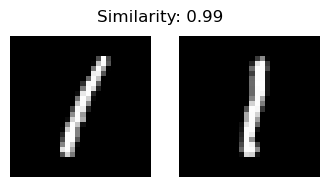

In [7]:
# loop over all image pairs
for (i, (pathA, pathB)) in enumerate(pairs):
	# load both the images and convert them to grayscale
	imageA = cv2.imread(pathA, 0)
	imageB = cv2.imread(pathB, 0)

	# create a copy of both the images for visualization purpose
	origA = imageA.copy()
	origB = imageB.copy()

	# add channel a dimension to both the images
	imageA = np.expand_dims(imageA, axis=-1)
	imageB = np.expand_dims(imageB, axis=-1)

	# add a batch dimension to both images
	imageA = np.expand_dims(imageA, axis=0)
	imageB = np.expand_dims(imageB, axis=0)

	# scale the pixel values to the range of [0, 1]
	imageA = imageA / 255.0
	imageB = imageB / 255.0

	# use our siamese model to make predictions on the image pair,
	# indicating whether or not the images belong to the same class
	preds = model.predict([imageA, imageB])
	proba = preds[0][0]

	# initialize the figure
	fig = plt.figure("Pair #{}".format(i + 1), figsize=(4, 2))
	plt.suptitle("Similarity: {:.2f}".format(proba))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(origA, cmap=plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(origB, cmap=plt.cm.gray)
	plt.axis("off")

	# show the plot
	plt.show()

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*Comparing images for similarity using siamese networks, Keras, and TensorFlow*](https://www.pyimagesearch.com/2020/12/07/comparing-images-for-similarity-using-siamese-networks-keras-and-tensorflow/) blog post published on 12-07-20.

# Code License Agreement
```
Copyright (c) 2020 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```